In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
x0 = 21000  # численность армии Х
y0 = 9850  # численность армии Y

# Между регулярными:
a1 = 0.44
b1 = 0.83
c1 = 0.45
h1 = 0.71

# Между регулярными и партизанами:
a2 = 0.31
b2 = 0.78
c2 = 0.25
h2 = 0.71

In [5]:
# Время
t0 = 0
tmax = 1
dt = 0.05
t = np.arange(t0, tmax, dt)

In [6]:
# Первый случай
def P1(t):
    p1 = np.cos(t) + 1
    return p1


def Q1(t):
    q1 = np.sin(t) + 1
    return q1


# Второй случай
def P2(t):
    p2 = abs(np.cos(2 * t))
    return p2


def Q2(t):
    q2 = abs(np.sin(4 * t))
    return q2

In [7]:
# Изменения численности

# Первый случай
def S1(f, t):
    s11 = -a1 * f[0] - b1 * f[1] + P1(t)
    s12 = -c1 * f[0] - h1 * f[1] + Q1(t)
    return s11, s12


# Второй случай
def S2(f, t):
    s21 = -a2 * f[0] - b2 * f[1] + P2(t)
    s22 = -c2 * f[0] * f[1] - h2 * f[1] + Q2(t)
    return s21, s22

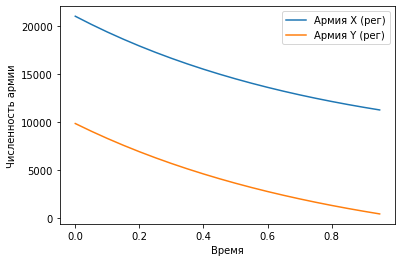

In [8]:
v = np.array([x0, y0])  # Вектор начальных условий

# Два решения
f1 = odeint(S1, v, t)
f2 = odeint(S2, v, t)

# Первый случай (две регулярные армии)
plt.plot(t, f1)
plt.ylabel('Численность армии')
plt.xlabel('Время')
plt.legend(['Армия X (рег)', 'Армия Y (рег)'])

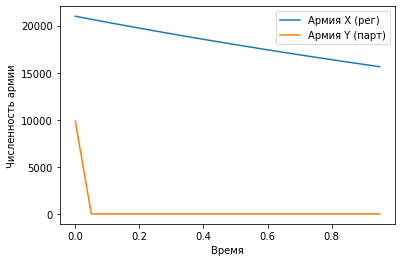

In [10]:
# Второй случай (регулярная армия и партизаны)
plt.plot(t, f2)
plt.ylabel('Численность армии')
plt.xlabel('Время')
plt.legend(['Армия X (рег)', 'Армия Y (парт)'])